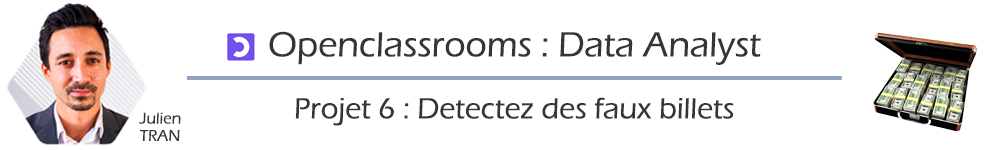

### Mission 3 :

Modélisez les données à l'aide d'une régression logistique. Grâce à celle-ci, vous créerez un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

### Sommaire // Mission 3 💶

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Regression logistique](#3)
    * [3.1.Creation du modele](#3.1)
    * [3.2.Estimation](#3.2)
    * [3.3.Prédiction](#3.3)
    * [3.4.Classification](#3.4)
* [4.Matrice de confusion](#4)
* [5.Courbe ROC](#5)
* [6.Programme test billet unique](#5)
    * [6.1.Programme test dataframe](#6.1)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#install.packages('summarytools')
#install.packages('ggfortify')
#install.packages('ggplot2')
#install.packages('ggcorrplot')
#install.packages('broom')
#install.packages('pander')
#install.packages('tidyverse')
#install.packages('cluster')
#install.packages('NbClust')
#install.packages('yardstick')
#install.packages('MASS')
#install.packages('caTools')
#install.packages('pROC')
#install.packages('ROCR')
#install.packages('repr')
#install.packages("dplyr")

In [2]:
#j'importe les librairies qui vont me servir plus tard

#library(tidyverse)
library(yardstick)
library(cluster)
library(NbClust)
library(factoextra)
library(FactoMineR)
library(ggplot2)
library(ggfortify)
library(ggcorrplot)
library(summarytools)
library(broom)
library(pander)
library(MASS)
library(caTools)
library(pROC)
library(ROCR)
library(repr)
library(dplyr)     

Warning message:
"package 'yardstick' was built under R version 3.6.3"For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.
Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp
For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')
Warning message:
"package 'pander' was built under R version 3.6.3"Warning message:
"package 'caTools' was built under R version 3.6.3"Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching 

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [3]:
#notes2 <- read.csv("C:/Users/33643/Desktop/P6/CSV/notes.csv", sep= ',', row.names=1, encoding="UTF-8")
notes <- read.csv("C:/Users/33643/Desktop/P6/CSV/notes.csv", sep= ',', head = TRUE, encoding="UTF-8")

head(notes)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,True,171.81,104.86,104.95,4.52,2.89,112.83
2,True,171.67,103.74,103.70,4.01,2.87,113.29
3,True,171.83,103.76,103.76,4.40,2.88,113.84
4,True,171.80,103.78,103.65,3.73,3.12,113.63
5,True,172.05,103.70,103.75,5.04,2.27,113.55
6,True,172.57,104.65,104.44,4.54,2.99,113.16


In [4]:
#Je tranforme la colonne is_genuine en données numérique
#notes$is_genuine <- as.numeric(notes$is_genuine)

#Je transforme la colonne is_genuine en 0 et 1 (False/True)
notes$is_genuine <- ifelse(notes$is_genuine == "False",0,1)

#je supprime les colonnes que je n'tuiliserai pas
notes2 <- notes[,c(1,2,3,4,5,6,7)]
notes3 <- notes[,c(2,3,4,5,6,7)]
head(notes2)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,171.81,104.86,104.95,4.52,2.89,112.83
2,1,171.67,103.74,103.70,4.01,2.87,113.29
3,1,171.83,103.76,103.76,4.40,2.88,113.84
4,1,171.80,103.78,103.65,3.73,3.12,113.63
5,1,172.05,103.70,103.75,5.04,2.27,113.55
6,1,172.57,104.65,104.44,4.54,2.99,113.16


## 3.Regression logistique <a class="anchor" id="3"></a>

Je crée plusieurs modèle en choisissant d'intégrer mes variables une à une en regardant le resultat de la P-value pour chaque variable, et décide de retirer au fur et à mesure les variables présentant une P-value supérieure à 5% en considérant qu'elles ne sont pas significatives.

In [5]:
modèle_1 <- glm(formula = is_genuine ~ diagonal,family="binomial",data=notes2)

modèle_2 <- glm(formula = is_genuine ~ diagonal+height_left,family="binomial",data=notes2)

modèle_3 <- glm(formula = is_genuine ~ diagonal+height_left+height_right,family="binomial",data=notes2)

modèle_4 <- glm(formula = is_genuine ~ diagonal+height_left+height_right+margin_low,family="binomial",data=notes2)

modèle_5 <- glm(formula = is_genuine ~ margin_low,family="binomial",data=notes2)

modèle_6 <- glm(formula = is_genuine ~ margin_low+length,family="binomial",data=notes2)
summary(modèle_6)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = is_genuine ~ margin_low + length, family = "binomial", 
    data = notes2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.03551  -0.00021   0.00012   0.00402   1.43823  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -944.419    377.481  -2.502   0.0124 *
margin_low   -13.366      5.314  -2.515   0.0119 *
length         8.942      3.552   2.518   0.0118 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 230.3481  on 169  degrees of freedom
Residual deviance:   8.5864  on 167  degrees of freedom
AIC: 14.586

Number of Fisher Scoring iterations: 11


Les variables margin_low et lentgh sont les plus significatives, comme on avait déja pu le constater avec les analyses bi-variées et la matrice des correlations.

In [6]:
#split data

split <- sample.split(notes2,SplitRatio = 0.8)
train <- subset(notes2,split == TRUE)
test <- subset(notes2,split == FALSE)

In [7]:
write.csv(x = train, file = "C:/Users/33643/Desktop/P6/CSV/billets_apprentissage.csv")

Entrainement du modele avec 80% de la data et 20% restant pour tester le modele.

Prédiction sur nos deux subsets

In [8]:
res_train <- predict(modèle_6,train, type = 'response')
res_train

1            3            4            6            7            8 
9.836072e-01 9.999996e-01 1.000000e+00 9.988627e-01 9.999998e-01 1.000000e+00 
          10           11           13           14           15           17 
3.554913e-01 1.000000e+00 9.999922e-01 1.000000e+00 1.000000e+00 9.999999e-01 
          18           20           21           22           24           25 
9.999148e-01 9.999997e-01 9.999247e-01 9.999976e-01 9.996585e-01 9.999999e-01 
          27           28           29           31           32           34 
9.999998e-01 9.905267e-01 1.000000e+00 1.000000e+00 9.999996e-01 9.980328e-01 
          35           36           38           39           41           42 
9.998876e-01 9.992466e-01 1.000000e+00 9.999999e-01 9.999990e-01 9.979440e-01 
          43           45           46           48           49           50 
9.974745e-01 9.999089e-01 9.999985e-01 1.000000e+00 9.999911e-01 1.000000e+00 
          52           53           55           56           57           59 
9.556107e-01 9.999918e-01 9.999993e-01 9.998670e-01 9.978713e-01 9.999990e-01 
          60           62           63           64           66           67 
9.999986e-01 1.000000e+00 9.999998e-01 9.999969e-01 9.514855e-01 9.999992e-01 
          69           70           71           73           74           76 
9.999998e-01 6.004705e-01 9.990343e-01 9.987435e-01 1.000000e+00 1.000000e+00 
          77           78           80           81           83           84 
9.994872e-01 9.999906e-01 1.000000e+00 9.637096e-01 9.999634e-01 9.999987e-01 
          85           87           88           90           91           92 
9.994867e-01 9.999426e-01 9.999985e-01 1.000000e+00 9.999932e-01 9.999474e-01 
          94           95           97           98           99          101 
1.000000e+00 9.999998e-01 9.922703e-01 9.999938e-01 9.981354e-01 1.427080e-04 
         102          104          105          106          108          109 
2.413742e-12 1.114867e-03 1.487167e-10 3.973738e-07 4.912903e-05 5.883793e-07 
         111          112          113          115          116          118 
2.103103e-02 3.719407e-06 6.377681e-02 1.062626e-06 7.005844e-02 1.407206e-11 
         119          120          122          123          125          126 
1.306958e-01 6.861163e-08 2.220446e-16 1.697377e-08 3.334956e-04 6.567076e-06 
         127          129          130          132          133          134 
1.396080e-02 1.337928e-03 6.998911e-05 1.938958e-13 2.442642e-07 3.483137e-07 
         136          137          139          140          141          143 
3.600197e-11 7.015061e-10 1.447379e-07 1.865729e-06 1.049685e-06 2.220446e-16 
         144          146          147          148          150          151 
4.157394e-07 9.373804e-06 1.818696e-13 7.896007e-09 5.680850e-06 2.339801e-08 
         153          154          155          157          158          160 
9.031646e-08 2.220446e-16 2.197857e-10 8.673442e-08 1.064466e-09 6.184447e-07 
         161          162          164          165          167          168 
5.281268e-03 4.579710e-10 2.911012e-12 6.794223e-10 2.011184e-09 2.182790e-09 
         169 
6.772559e-04

In [9]:
res_test <- predict(modèle_6,test, type = 'response')
res_test

2            5            9           12           16           19 
9.999997e-01 9.729427e-01 9.999999e-01 1.000000e+00 9.994440e-01 1.000000e+00 
          23           26           30           33           37           40 
9.999941e-01 1.000000e+00 1.000000e+00 9.999700e-01 9.999998e-01 9.999704e-01 
          44           47           51           54           58           61 
9.709669e-01 9.999948e-01 9.999998e-01 1.000000e+00 9.958242e-01 9.999802e-01 
          65           68           72           75           79           82 
9.999774e-01 9.995359e-01 9.999968e-01 1.000000e+00 9.999910e-01 9.999963e-01 
          86           89           93           96          100          103 
9.993622e-01 1.000000e+00 9.999992e-01 9.999680e-01 9.999986e-01 8.740214e-01 
         107          110          114          117          121          124 
1.029357e-01 2.423011e-05 2.212405e-10 1.566199e-10 1.261174e-06 1.650776e-06 
         128          131          135          138          142          145 
3.095694e-06 7.294206e-08 5.505698e-05 6.441675e-08 4.225489e-08 4.234184e-05 
         149          152          156          159          163          166 
7.829765e-09 2.220446e-16 5.092988e-13 2.220446e-16 1.185334e-10 3.319867e-07 
         170 
1.182584e-12

## 4.Matrice de confusion <a class="anchor" id="4"></a>

Validation du programme par matrice de confusion

In [10]:
#Je créé une crosstable avec mes colonnes is_genuine et clusters
ctable <- table(test$is_genuine, res_test > 0.5)

#je renomme mes noms de colonnes et index
rownames(ctable) <- c("False","True")
colnames(ctable) <- c("< 0.5","> 0.5")
ctable

       
        < 0.5 > 0.5
  False    19     1
  True      0    29

integer(0)

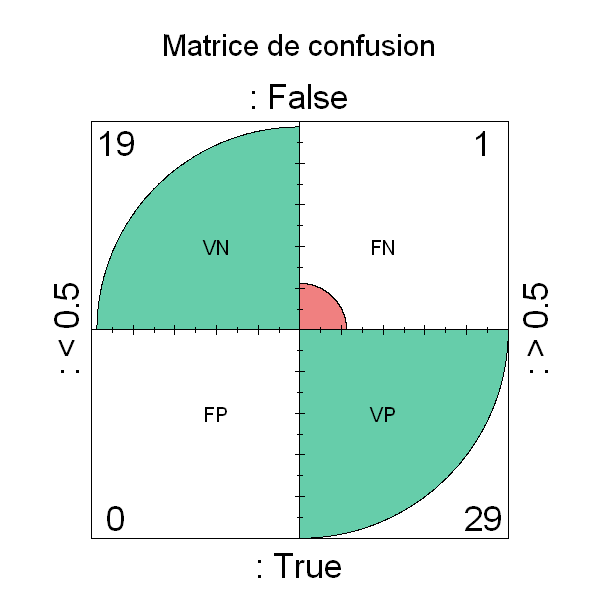

In [11]:
options(repr.plot.width=5, repr.plot.height=5)

#Je créé une matrice de confusion
fourfoldplot(ctable, color = c("light coral", "medium aqua marine"),
             conf.level = 0, margin = 1, main = "Matrice de confusion") + 
text(-0.4,0.4, "VN", cex=1) + 
text(0.4, -0.4, "VP", cex=1) + 
text(0.4,0.4, "FN", cex=1) + 
text(-0.4, -0.4, "FP", cex=1)

Précision du modele : J'ai a une précision de 98%, ce qui est excellent.

In [12]:
(ctable[[1,1]] + ctable[[2,2]]) / sum(ctable)

[1] 0.9795918

In [13]:
#liste des billets vrais negatifs

VN <- which(test[,1] == 0 & res_test < 0.5)
VN

107 110 114 117 121 124 128 131 135 138 142 145 149 152 156 159 163 166 170 
 31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49

In [14]:
#liste des billets vrais positifs

VP <- which(test[,1] == 1 & res_test > 0.5)
VP

2   5   9  12  16  19  23  26  30  33  37  40  44  47  51  54  58  61  65  68 
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 72  75  79  82  86  89  93  96 100 
 21  22  23  24  25  26  27  28  29

## 5.Courbe ROC <a class="anchor" id="5"></a>

La fonction d’efficacité du récepteur, plus fréquemment désignée sous le terme « courbe ROC», dite aussi caractéristique de performance (d'un test) ou courbe sensibilité/spécificité, est une mesure de la performance d'un classificateur binaire.
Graphiquement, on représente souvent la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs en fonction du taux de faux positifs.
Un score AUC de 1 représente un classificateur parfait, un score de 0.5 représente un classificateur inutile.

In [15]:
pred = predict(modèle_6,notes2,type="response")

In [16]:
pred = prediction(pred, notes2$is_genuine)

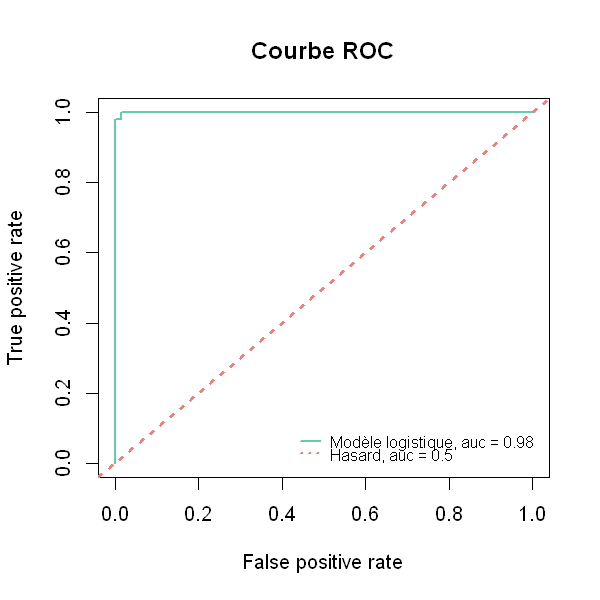

In [17]:
options(repr.plot.width=5, repr.plot.height=5)

roc = performance(pred,"tpr","fpr")

plot(roc, col = 'medium aqua marine', lwd = 2, main = 'Courbe ROC', show.stats = TRUE)
legend(0.42,0.1, legend=c("Modèle logistique, auc = 0.98", "Hasard, auc = 0.5"),
       col=c("medium aqua marine", "light coral"), lty=c(1,3),lwd=2,box.lty=0,cex=0.8)
abline(a = 0, b = 1, col = 'light coral',lty=3,lwd=3)

## 6.Programme test billet unique <a class="anchor" id="6"></a>

#### Margin_low min = 3.54, max = 6.28 /  Length = 109.97, max = 113.98

In [18]:
x <- data.frame(margin_low = 4.9, length = 113)

In [19]:
P <- predict(modèle_6, x, type = 'response')
P

ifelse(P > 0.5, "Le billet est authentique !", "Le billet n'est pas authentique !!")

1 
0.630762

1 
"Le billet est authentique !"

## 6.1.Programme test dataframe <a class="anchor" id="6.1"></a>

In [20]:
options(max.print=999)

# Chargement du fichier
#data_test <- read.csv("C:/Users/33643/Desktop/P6/CSV/notes.csv")
data_test <- read.csv("C:/Users/33643/Desktop/P6/SOUTENANCE/test_notes.csv")

head(data_test)

,diagonal,height_left,height_right,margin_low,margin_up,length,id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,172.09,103.95,103.73,4.39,3.09,113.19,B_1
2,171.52,104.17,104.03,5.27,3.16,111.82,B_2
3,171.78,103.80,103.75,3.81,3.24,113.39,B_3
4,172.02,104.08,103.99,5.57,3.30,111.10,B_4
5,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [21]:
# Selection des colonnes à garder
test_set_data <- data_test[,c(4,6)]

#selection des colonnes plutot par nom de variable, la place des variables veut varier d'un fichier à un autre

# Ajout du colonne index
test_set_data$index <- 1:nrow(test_set_data)

# Prédiction sur mon fichier
predict <- predict(modèle_6,test_set_data, type ='response')

# Creation d'un df avec une colonne prédiction
prediction <- data.frame('id'= test_set_data$index,'prediction' = predict)

# Ajout d'une colonne authenticité
prediction$authenticité <- ifelse(prediction$prediction >0.5, 'Vrai billet','Faux billet !')
print(prediction, row.names = FALSE)

 id   prediction  authenticité
  1 9.998827e-01   Vrai billet
  2 3.179196e-07 Faux billet !
  3 1.000000e+00   Vrai billet
  4 9.221498e-12 Faux billet !
  5 1.835528e-05 Faux billet !
